In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly 
import plotly.express as ex
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


sns.set(style= 'whitegrid', color_codes=True)

In [4]:
df = pd.read_csv("dataset/RoadAccident(United Kingdom(UK))Dataset/UK_Accident.csv")
final_df = df
final_df.shape

(1504150, 33)

In [5]:
final_df.sample(4)

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
16565,16565,200501SX20147,519440.0,191930.0,-0.276359,51.613486,1,3,2,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01000192,2005
751751,181740,201001TX20865,520050.0,177640.0,-0.272425,51.484925,1,3,1,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,1,No,E01002576,2010
1479742,440289,201450ED2J030,246312.0,56692.0,-4.163460,50.389906,50,3,1,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Wet/Damp,None,None,1,Yes,E01015072,2014
669991,99980,2009400D02359,492350.0,225170.0,-0.658656,51.917365,40,3,1,2,...,Zebra crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,E01017555,2009


In [6]:
print(final_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Unnamed: 0                                   1504150 non-null  int64  
 1   Accident_Index                               1504150 non-null  object 
 2   Location_Easting_OSGR                        1504049 non-null  float64
 3   Location_Northing_OSGR                       1504150 non-null  float64
 4   Longitude                                    1504049 non-null  float64
 5   Latitude                                     1504150 non-null  float64
 6   Police_Force                                 1504150 non-null  int64  
 7   Accident_Severity                            1504150 non-null  int64  
 8   Number_of_Vehicles                           1504150 non-null  int64  
 9   Number_of_Casualties                         1

In [8]:
final_df["Year"].unique()
final_df

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504145,464692,2.01E+12,310037.0,597647.0,-3.417278,55.264773,98,2,2,1,...,No physical crossing within 50 meters,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes,NaN,2014
1504146,464693,2.01E+12,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,...,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes,NaN,2014
1504147,464694,2.01E+12,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes,NaN,2014
1504148,464695,2.01E+12,323869.0,566853.0,-3.191397,54.990446,98,2,3,2,...,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,NaN,2014


In [9]:
final_df['Road_Surface_Conditions'].fillna(value = 'Normal', inplace = True)
final_df['Special_Conditions_at_Site'].fillna(value = 'None', inplace = True)
final_df['Carriageway_Hazards'].fillna(value = 'None', inplace = True)
final_df['Did_Police_Officer_Attend_Scene_of_Accident'].fillna(value = 'No', inplace = True)
final_df['Weather_Conditions'].fillna(value = 'Unknown', inplace = True)
final_df['Junction_Control'].fillna(value = 'None', inplace = True)
final_df['Location_Northing_OSGR'].fillna(value = 0, inplace = True)
final_df['Latitude'].fillna(value = 0, inplace = True)

In [10]:
data = {'Casualties_Count' : final_df['Number_of_Casualties'],
             'Day_of_Week' : final_df['Day_of_Week']}
accidents_per_week = pd.DataFrame(data)
accidents_per_week.groupby(by='Day_of_Week').sum().sort_values(by = 'Casualties_Count', ascending = False)

,Casualties_Count
Day_of_Week,
6,331934
5,299044
4,297756
3,294476
7,285261
2,284043
1,239532


<AxesSubplot:xlabel='Day_of_Week', ylabel='count'>

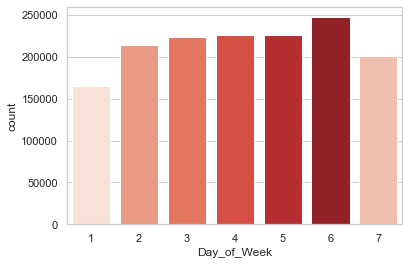

In [15]:
cas_count= accidents_per_week.groupby(by='Day_of_Week').sum().sort_values(by = 'Casualties_Count', ascending = False)
size_gb= accidents_per_week.groupby(by='Day_of_Week').size()
dev_color= size_gb.argsort().argsort() 
pal= sns.color_palette('Reds', len(dev_color))
sns.countplot(x=accidents_per_week.Day_of_Week, 
              data=accidents_per_week,
              palette=np.array(pal[::])[dev_color]) 

In [16]:
accidents_per_week['Speed_Limit'] = final_df.Speed_limit
accidents_per_week.sample(4)

,Casualties_Count,Day_of_Week,Speed_Limit
1054986,1,3,30
280537,1,1,30
1183229,1,6,30
884876,1,5,30


In [23]:
accident_severity_data = {'Light_Conditions' : final_df.Light_Conditions, 
                          'Weather_Conditions' : final_df.Weather_Conditions,
                          'Accident_Severity' : final_df.Accident_Severity}
accident_severity_df = pd.DataFrame(accident_severity_data)
accident_severity_df.sample(4)

,Light_Conditions,Weather_Conditions,Accident_Severity
1241500,Daylight: Street light present,Fine without high winds,3
355188,Darkness: Street lights present and lit,Raining with high winds,3
1285578,Darkness: Street lights present and lit,Fine without high winds,2
521844,Daylight: Street light present,Fine without high winds,3


In [24]:
print(accident_severity_df.describe(),'\n')
print(accident_severity_df.info())

       Accident_Severity
count       1.504150e+06
mean        2.838190e+00
std         4.018423e-01
min         1.000000e+00
25%         3.000000e+00
50%         3.000000e+00
75%         3.000000e+00
max         3.000000e+00 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 3 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   Light_Conditions    1504150 non-null  object
 1   Weather_Conditions  1504150 non-null  object
 2   Accident_Severity   1504150 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 34.4+ MB
None


In [25]:
for object_feature in accident_severity_df.dtypes[accident_severity_df.dtypes == 'object'].index :
     accident_severity_df[object_feature] = accident_severity_df[object_feature].astype('category')
accident_severity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 3 columns):
 #   Column              Non-Null Count    Dtype   
---  ------              --------------    -----   
 0   Light_Conditions    1504150 non-null  category
 1   Weather_Conditions  1504150 non-null  category
 2   Accident_Severity   1504150 non-null  int64   
dtypes: category(2), int64(1)
memory usage: 14.3 MB


In [26]:
accident_severity_df = pd.get_dummies(data=accident_severity_df, columns=['Light_Conditions', 'Weather_Conditions'])
accident_severity_df.sample(2)

,Accident_Severity,Light_Conditions_Darkeness: No street lighting,Light_Conditions_Darkness: Street lighting unknown,Light_Conditions_Darkness: Street lights present and lit,Light_Conditions_Darkness: Street lights present but unlit,Light_Conditions_Daylight: Street light present,Weather_Conditions_Fine with high winds,Weather_Conditions_Fine without high winds,Weather_Conditions_Fog or mist,Weather_Conditions_Other,Weather_Conditions_Raining with high winds,Weather_Conditions_Raining without high winds,Weather_Conditions_Snowing with high winds,Weather_Conditions_Snowing without high winds,Weather_Conditions_Unknown
133319,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0
178942,3,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [27]:
accident_severity = accident_severity_df.corr().loc['Accident_Severity':] 
accident_severity = pd.DataFrame(accident_severity)

In [28]:
accident_severity

,Accident_Severity,Light_Conditions_Darkeness: No street lighting,Light_Conditions_Darkness: Street lighting unknown,Light_Conditions_Darkness: Street lights present and lit,Light_Conditions_Darkness: Street lights present but unlit,Light_Conditions_Daylight: Street light present,Weather_Conditions_Fine with high winds,Weather_Conditions_Fine without high winds,Weather_Conditions_Fog or mist,Weather_Conditions_Other,Weather_Conditions_Raining with high winds,Weather_Conditions_Raining without high winds,Weather_Conditions_Snowing with high winds,Weather_Conditions_Snowing without high winds,Weather_Conditions_Unknown
Accident_Severity,1.000000,-0.071174,0.002657,-0.018362,-0.003769,0.053096,-0.005982,-0.025910,-0.004042,0.012961,0.000549,0.018437,0.003080,0.010913,0.017108
Light_Conditions_Darkeness: No street lighting,-0.071174,1.000000,-0.025083,-0.119369,-0.016370,-0.399076,0.018572,-0.074911,0.058249,0.037683,0.048193,0.033486,0.028193,0.031123,-0.015329
Light_Conditions_Darkness: Street lighting unknown,0.002657,-0.025083,1.000000,-0.051555,-0.007070,-0.172360,-0.002335,-0.044742,0.005986,0.002229,0.000384,-0.006382,0.000715,0.003057,0.140243
Light_Conditions_Darkness: Street lights present and lit,-0.018362,-0.119369,-0.051555,1.000000,-0.033648,-0.820269,0.006970,-0.093839,0.011799,0.031787,0.041990,0.081967,0.001151,0.016986,-0.012381
Light_Conditions_Darkness: Street lights present but unlit,-0.003769,-0.016370,-0.007070,-0.033648,1.000000,-0.112492,0.003017,-0.018033,0.005796,0.008136,0.010302,0.012519,0.002725,0.001946,-0.001917
Light_Conditions_Daylight: Street light present,0.053096,-0.399076,-0.172360,-0.820269,-0.112492,1.000000,-0.015741,0.136071,-0.042865,-0.049729,-0.064212,-0.091339,-0.016129,-0.032296,-0.013322
Weather_Conditions_Fine with high winds,-0.005982,0.018572,-0.002335,0.006970,0.003017,-0.015741,1.000000,-0.222582,-0.008224,-0.016776,-0.013166,-0.040677,-0.004015,-0.009670,-0.015425
Weather_Conditions_Fine without high winds,-0.025910,-0.074911,-0.044742,-0.093839,-0.018033,0.136071,-0.222582,1.000000,-0.148175,-0.302260,-0.237214,-0.732891,-0.072337,-0.174238,-0.277918
Weather_Conditions_Fog or mist,-0.004042,0.058249,0.005986,0.011799,0.005796,-0.042865,-0.008224,-0.148175,1.000000,-0.011168,-0.008765,-0.027079,-0.002673,-0.006438,-0.010268
Weather_Conditions_Other,0.012961,0.037683,0.002229,0.031787,0.008136,-0.049729,-0.016776,-0.302260,-0.011168,1.000000,-0.017879,-0.055238,-0.005452,-0.013132,-0.020947


<AxesSubplot:>

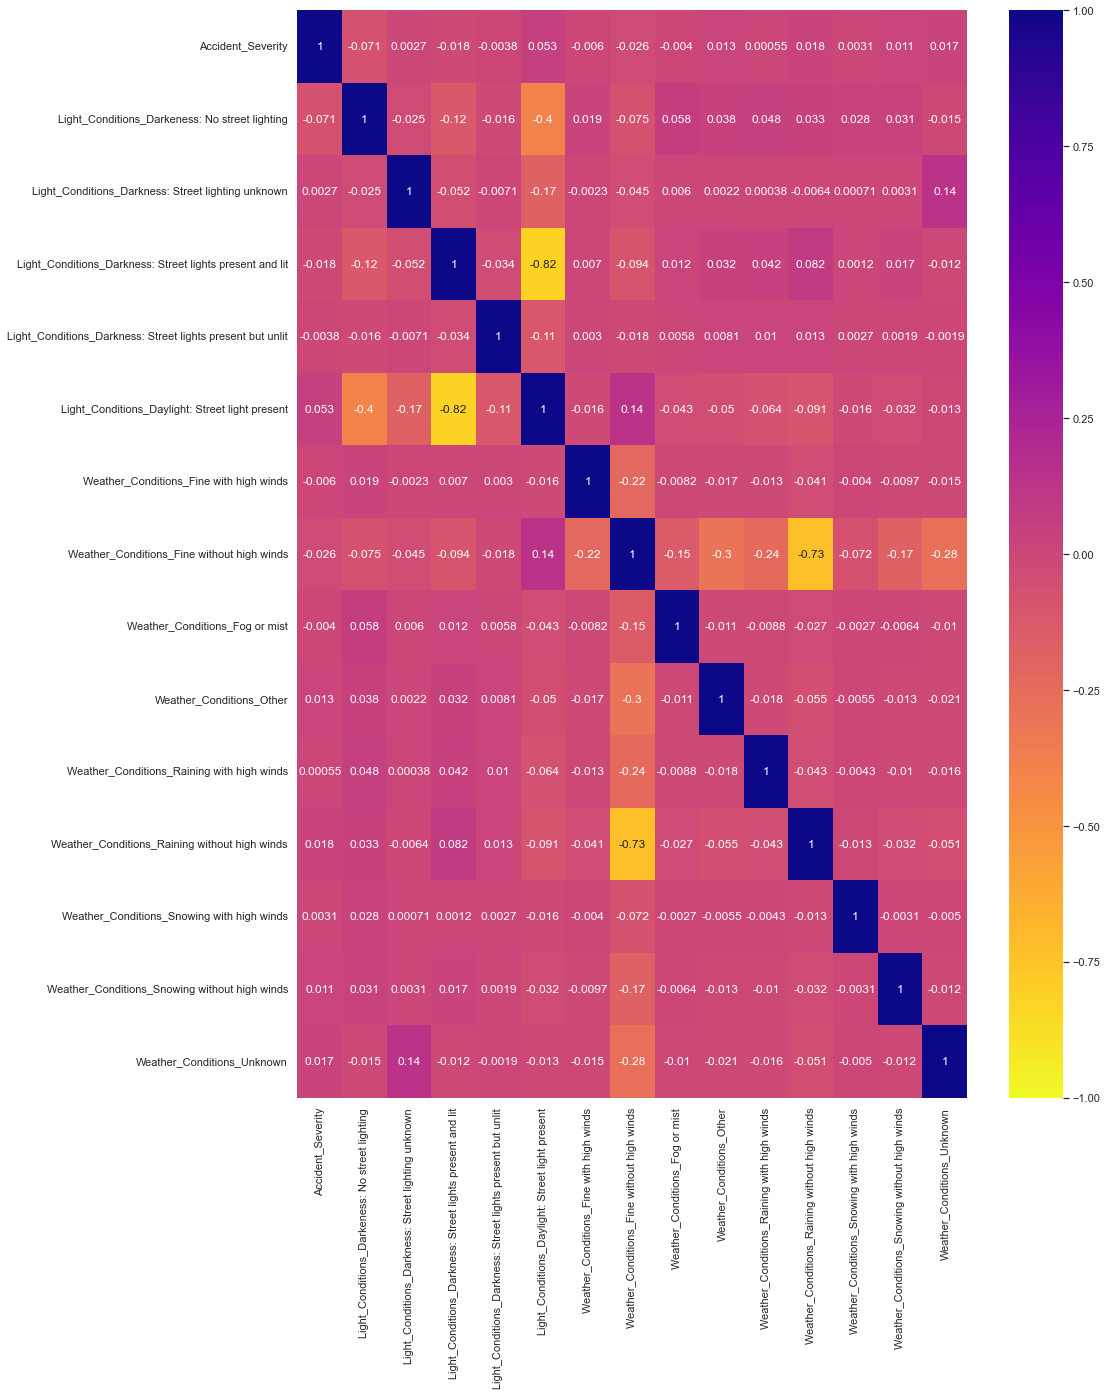

In [29]:
plt.figure(figsize=(15,20))
sns.heatmap(accident_severity, vmin=-1, cmap='plasma_r', annot = True)

In [30]:
accident_severity_df =final_df.copy()
accident_severity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Unnamed: 0                                   1504150 non-null  int64  
 1   Accident_Index                               1504150 non-null  object 
 2   Location_Easting_OSGR                        1504049 non-null  float64
 3   Location_Northing_OSGR                       1504150 non-null  float64
 4   Longitude                                    1504049 non-null  float64
 5   Latitude                                     1504150 non-null  float64
 6   Police_Force                                 1504150 non-null  int64  
 7   Accident_Severity                            1504150 non-null  int64  
 8   Number_of_Vehicles                           1504150 non-null  int64  
 9   Number_of_Casualties                         1

In [31]:
accident_severity_df['Pedestrian_Crossing-Human_Control'].value_counts() 
accident_severity_df['Pedestrian_Crossing-Physical_Facilities'].value_counts() 
accident_severity_df['Light_Conditions'].value_counts() 
accident_severity_df['Special_Conditions_at_Site'].value_counts() 
accident_severity_df['Carriageway_Hazards'].value_counts()
accident_severity_df['Junction_Control'].value_counts()

Giveway or uncontrolled     733940
None                        602835
Automatic traffic signal    155717
Stop Sign                     9179
Authorised person             2479
Name: Junction_Control, dtype: int64

<AxesSubplot:xlabel='Road_Type', ylabel='Accident_Severity'>

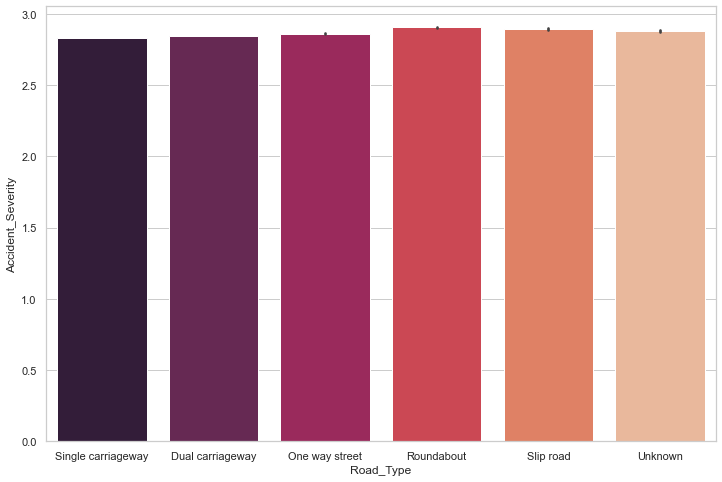

In [32]:
drop_cols= ['Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities','Light_Conditions'
           ,'Special_Conditions_at_Site','Carriageway_Hazards','Carriageway_Hazards','Junction_Control'
           ,'Did_Police_Officer_Attend_Scene_of_Accident']
plt.figure(figsize=(12,8))
sns.barplot(x = 'Road_Type', y = 'Accident_Severity', data = accident_severity_df, palette='rocket')

<AxesSubplot:xlabel='Road_Surface_Conditions', ylabel='Accident_Severity'>

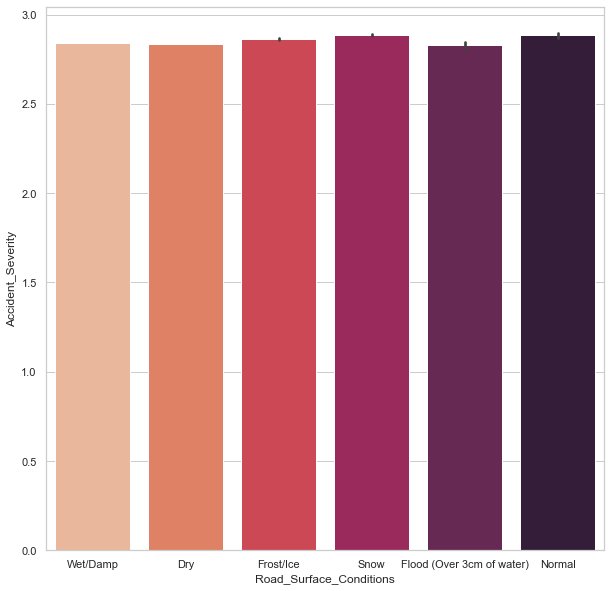

In [33]:
plt.figure(figsize=(10,10))
sns.barplot(x = 'Road_Surface_Conditions', y = 'Accident_Severity', data = accident_severity_df, palette='rocket_r')

In [34]:
for feature in accident_severity_df.dtypes[accident_severity_df.dtypes == 'object'].index :
    accident_severity_df.drop(columns = feature, inplace = True)
accident_severity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 18 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Unnamed: 0                  1504150 non-null  int64  
 1   Location_Easting_OSGR       1504049 non-null  float64
 2   Location_Northing_OSGR      1504150 non-null  float64
 3   Longitude                   1504049 non-null  float64
 4   Latitude                    1504150 non-null  float64
 5   Police_Force                1504150 non-null  int64  
 6   Accident_Severity           1504150 non-null  int64  
 7   Number_of_Vehicles          1504150 non-null  int64  
 8   Number_of_Casualties        1504150 non-null  int64  
 9   Day_of_Week                 1504150 non-null  int64  
 10  Local_Authority_(District)  1504150 non-null  int64  
 11  1st_Road_Class              1504150 non-null  int64  
 12  1st_Road_Number             1504150 non-null  int64  
 1

In [35]:
corr_matrix = accident_severity_df.corr()
corr_matrix

,Unnamed: 0,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
Unnamed: 0,1.000000,-0.099098,-0.018978,-0.101058,-0.018249,0.333496,-0.011277,0.003448,0.005047,-0.001842,0.340397,0.017955,0.006321,0.081329,-0.042901,-0.003913,0.099965,0.102025
Location_Easting_OSGR,-0.099098,1.000000,-0.420212,0.999359,-0.422123,-0.356474,0.013465,0.017152,-0.040780,-0.001883,-0.380452,-0.060289,-0.084678,-0.063709,0.044525,-0.000128,-0.095941,0.038404
Location_Northing_OSGR,-0.018978,-0.420212,1.000000,-0.430722,0.962771,0.167844,-0.031392,-0.041357,0.032092,0.003848,0.121125,0.035438,0.043899,0.047655,-0.030743,0.017022,0.053073,-0.013490
Longitude,-0.101058,0.999359,-0.430722,1.000000,-0.432531,-0.369755,0.013946,0.018442,-0.039501,-0.001894,-0.390536,-0.058800,-0.082418,-0.062824,0.045050,0.001401,-0.094278,0.038059
Latitude,-0.018249,-0.422123,0.962771,-0.432531,1.000000,0.156826,-0.030076,-0.039285,0.030983,0.003523,0.112444,0.033848,0.043064,0.044220,-0.028189,0.017234,0.042961,-0.010155
Police_Force,0.333496,-0.356474,0.167844,-0.369755,0.156826,1.000000,-0.031712,-0.015491,0.007073,0.000428,0.981975,0.044895,-0.000199,0.197990,-0.119040,-0.018276,0.240858,-0.033599
Accident_Severity,-0.011277,0.013465,-0.031392,0.013946,-0.030076,-0.031712,1.000000,0.075976,-0.083544,0.002961,-0.031995,0.012754,-0.004072,-0.079108,0.064321,0.026128,-0.082169,-0.005907
Number_of_Vehicles,0.003448,0.017152,-0.041357,0.018442,-0.039285,-0.015491,0.075976,1.000000,0.237349,-0.000116,-0.010506,-0.142306,-0.008871,0.084785,0.068607,0.024320,0.041081,-0.007846
Number_of_Casualties,0.005047,-0.040780,0.032092,-0.039501,0.030983,0.007073,-0.083544,0.237349,1.000000,-0.001455,0.014316,-0.082984,0.007750,0.139551,-0.029212,0.001997,0.115974,-0.015140
Day_of_Week,-0.001842,-0.001883,0.003848,-0.001894,0.003523,0.000428,0.002961,-0.000116,-0.001455,1.000000,0.000325,0.006843,0.002344,-0.015944,0.007822,0.000385,-0.016571,-0.003669


<AxesSubplot:>

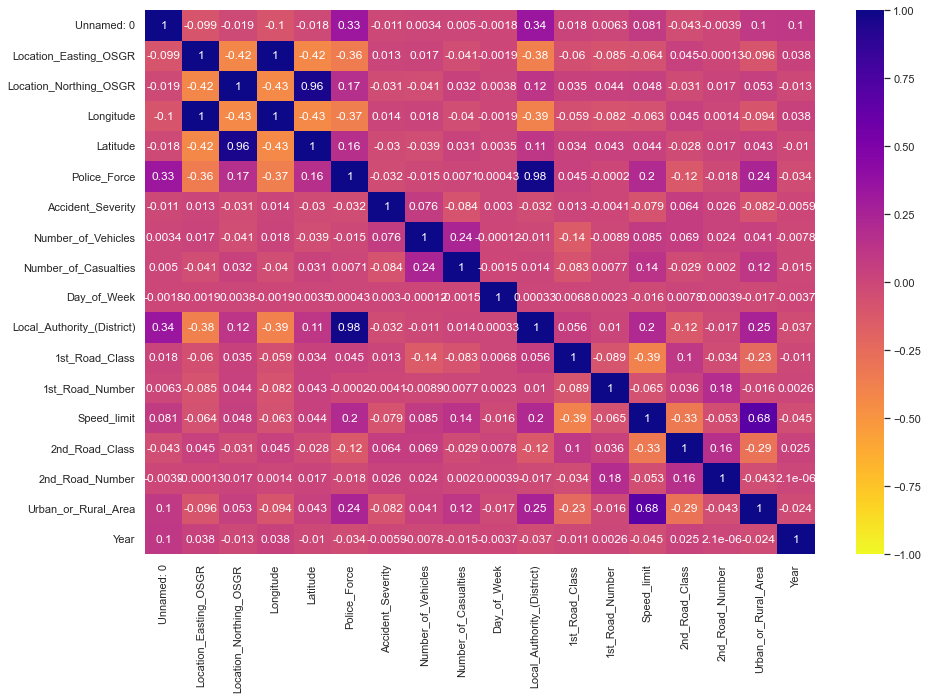

In [36]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, vmin=-1, cmap='plasma_r')

<AxesSubplot:>

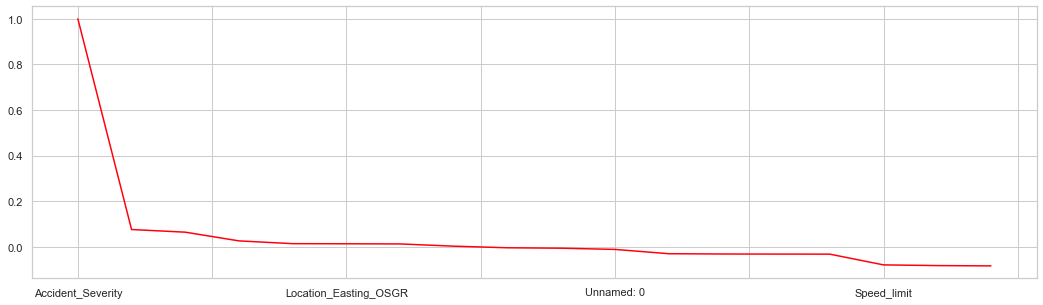

In [37]:
plt.figure(figsize=(18,5))
corr_matrix['Accident_Severity'].sort_values(ascending=False).plot(color='#ff000d')

In [38]:
final_accident_severity_df = accident_severity_df.copy()
final_accident_severity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 18 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Unnamed: 0                  1504150 non-null  int64  
 1   Location_Easting_OSGR       1504049 non-null  float64
 2   Location_Northing_OSGR      1504150 non-null  float64
 3   Longitude                   1504049 non-null  float64
 4   Latitude                    1504150 non-null  float64
 5   Police_Force                1504150 non-null  int64  
 6   Accident_Severity           1504150 non-null  int64  
 7   Number_of_Vehicles          1504150 non-null  int64  
 8   Number_of_Casualties        1504150 non-null  int64  
 9   Day_of_Week                 1504150 non-null  int64  
 10  Local_Authority_(District)  1504150 non-null  int64  
 11  1st_Road_Class              1504150 non-null  int64  
 12  1st_Road_Number             1504150 non-null  int64  
 1

In [39]:
for feature in accident_severity_df.dtypes[accident_severity_df.dtypes != 'object'].index :
    if(corr_matrix['Accident_Severity'][feature] < 0.02 and  corr_matrix['Accident_Severity'][feature] > -0.02) :
        final_accident_severity_df.drop(columns = feature, inplace = True) 

In [40]:
final_accident_severity_df.sample(4)

,Location_Northing_OSGR,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Local_Authority_(District),Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area
784137,441140.0,53.866435,13,3,2,2,200,30,6,0,1
731210,664390.0,55.855684,97,3,2,1,932,30,6,0,1
613249,562430.0,54.956158,10,3,2,1,146,70,-1,0,1
860203,56580.0,50.388662,50,3,2,3,583,30,5,0,1


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
check = final_accident_severity_df.copy()
severity = check['Accident_Severity']
severity = pd.DataFrame(severity, columns = ['Accident_Severity'])
severity.sample(3)

,Accident_Severity
731718,3
1067562,3
467623,3


In [42]:
model = LogisticRegression(solver = 'lbfgs', max_iter = 100)
score = cross_val_score(model, check, severity, cv = 5)
score.mean()

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

0.8511152478143803